# Measuring distances 
_Maydan Wienreb_
<img src="https://raw.githubusercontent.com/maydanw/InEasyReach/master/hr-brian-litzinger-one.png" alt="Drawing" style="width: 100%; height: 60px" />

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Imports

In [2]:
"""
This will enable completion on elements of lists, results of function calls, etc.
However, be warned that enabling this option can be unsafe, because the code is actually evaluated upon hitting TAB
"""
%config IPCompleter.greedy=True
# import graphics
%matplotlib inline

from typing import Dict, Tuple, List

# import numpy
import numpy as np
np.random.seed(0) # Remmeber to reset the seed every time if you expect the second draw to be the same as the first.

#import pandas
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


# %matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns



# %load_ext autoreload
# %autoreload 1
# %aimport TestFunctions
## See: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html


In [3]:
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
sns.set_style("whitegrid")

In [4]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

# Do run in the first time: jupyter nbextension enable --py --sys-prefix widgetsnbextension

Loading BokehJS ...

In [5]:
import types
import sys
print ("Basic packages versions:")
print ("   Python version: %s" % (sys.version))
print ("   Packages:")


try:  
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))
except: 
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))

Basic packages versions:
   Python version: 3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)]
   Packages:
   json: 2.0.9
   numpy: 1.15.0
   pandas: 0.23.3
   seaborn: 0.9.0


{'whiskers': [<matplotlib.lines.Line2D at 0x255dd131b00>,
 'caps': [<matplotlib.lines.Line2D at 0x255dd131d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x255dd1312b0>,
 'medians': [<matplotlib.lines.Line2D at 0x255dd14acf8>,
 'fliers': [<matplotlib.lines.Line2D at 0x255dd14aeb8>,
 'means': []}

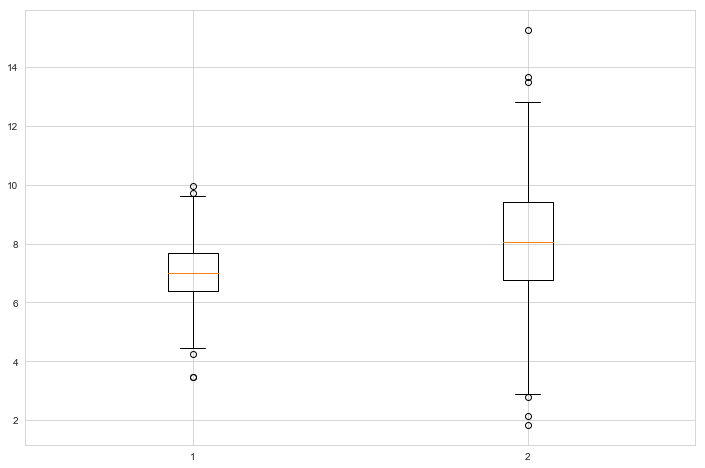

In [34]:
s1 = np.random.normal(7,1,1000)
s2 = np.random.normal(8,2,1000)
plt.boxplot([s1,s2])

In [35]:
def cum_dist(sample1, sample2, plot=True):
    num_bins = 200
    counts1, bin_edges1 = np.histogram (sample1, bins=num_bins)
    cdf1 = np.cumsum (counts1)
    cdf1 = np.insert(cdf1, 0, 0, axis=0)

    counts2, bin_edges2 = np.histogram (sample2, bins=num_bins)
    cdf2 = np.cumsum (counts2)
    cdf2 = np.insert(cdf2, 0, 0, axis=0)
    
    if plot:
        plt.plot (bin_edges1, cdf1/cdf1[-1])
        plt.plot (bin_edges2, cdf2/cdf2[-1])
        plt.show()
        
    unified = np.append(bin_edges1[1:],bin_edges2[1:])
    unified.sort()

    u1=np.digitize(unified,bin_edges1)
    u1[u1>=num_bins]=num_bins
    v1 = cdf1[u1]/cdf1[-1]

    u2=np.digitize(unified,bin_edges2)
    u2[u2>=num_bins]=num_bins
    v2 = cdf2[u2]/cdf2[-1]
    return ((v2-v1)**2).sum()**0.5         

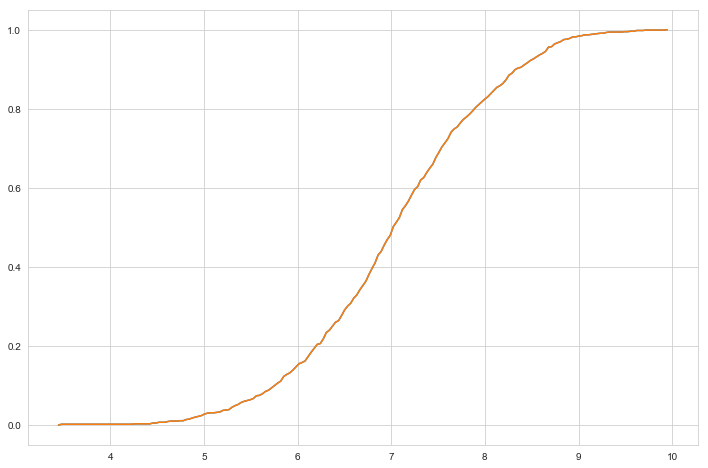

0.0


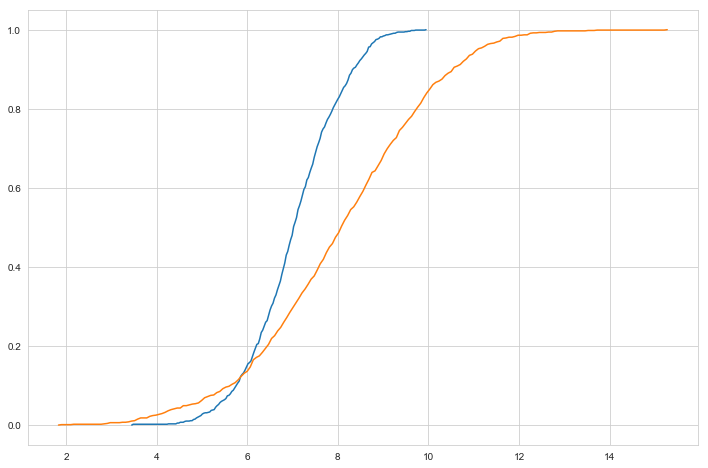

3.4709399303358737


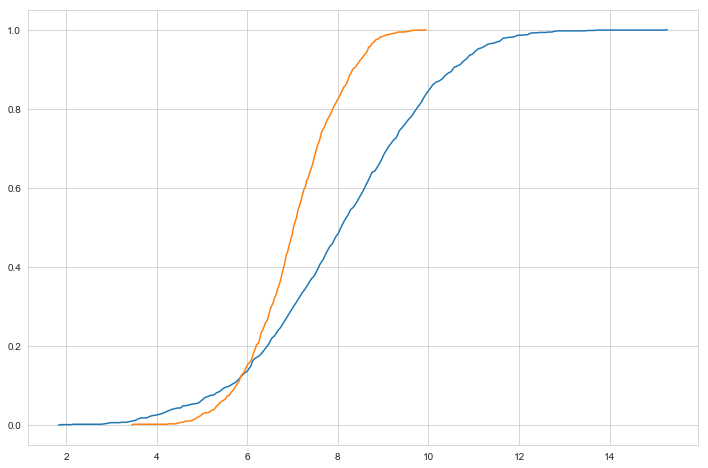

3.4709399303358737


In [36]:
print(cum_dist(s1,s1))
print(cum_dist(s1,s2))
print(cum_dist(s2,s1))